In [1]:
## Importing the basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Lets ignore thye warnings by
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Lets set the maximum column by 
pd.set_option('display.max_columns', None)

In [4]:
#Lets imoprt the dataset
df = pd.read_csv('/Users/ajithkhan/Downloads/iNeutron/Datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## STEP 1. EDA 

In [5]:
#Shape of the dataset
df.shape

(5110, 12)

In [6]:
#Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#Lets drop the unwanted columns 
df.drop('id', axis =1, inplace=True)

In [8]:
#Lets change the dtypes correctely
df['stroke'] = df['stroke'].astype('object')
df['hypertension'] = df['hypertension'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')

In [9]:
#Lets seperate the numerical columna 
num_cols = [x for x in df.columns if df[x].dtype != 'O']
num_cols

['age', 'avg_glucose_level', 'bmi']

In [10]:
#Lets get the categorical column
cat_cols = [y for y in df.columns if df[y].dtype == 'O']
cat_cols 

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [11]:
#Lets check for the unique values for categorical columns
for i in df[cat_cols]:
    print(df[i].value_counts())
    print('---------------------------------------------')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
---------------------------------------------
0    4612
1     498
Name: hypertension, dtype: int64
---------------------------------------------
0    4834
1     276
Name: heart_disease, dtype: int64
---------------------------------------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
---------------------------------------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
---------------------------------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
---------------------------------------------
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
---------------------------------------------
0    4861
1     249
Name: stroke, dtype: int64
---------------------------------------------


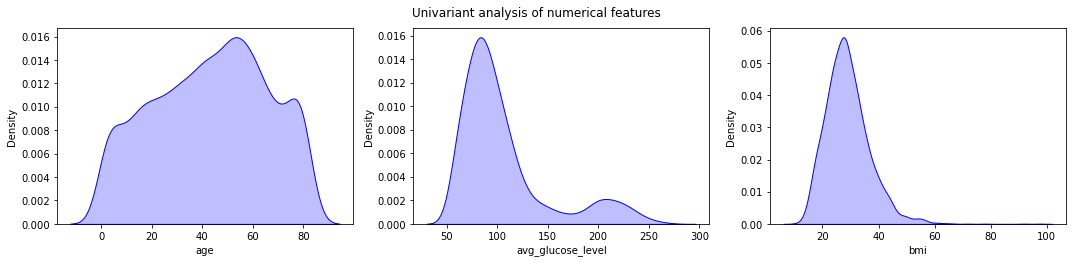

In [12]:
#Univariante analysis of numerical features using kdeplot without hue 
plt.figure(figsize=(15,10))
plt.suptitle('Univariant analysis of numerical features')
for i in range(0, len(num_cols)):
    plt.subplot(3,3, i+1)
    sns.kdeplot(x= df[num_cols[i]], data = df,  shade = True, color = 'b')
    plt.tight_layout();

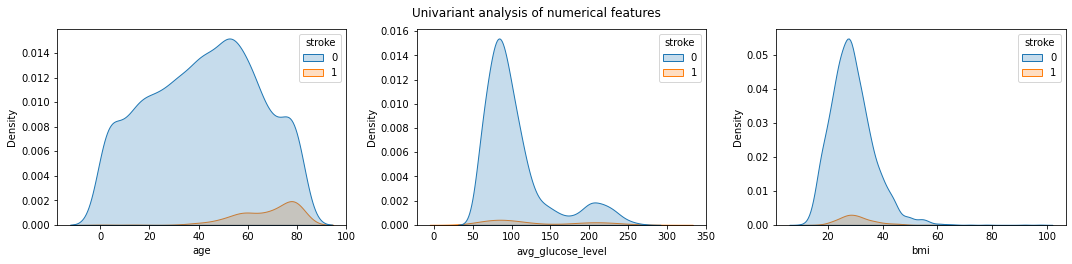

In [13]:
#Univariante analysis of numerical features using kdeplot with hue 
plt.figure(figsize=(15,10))
plt.suptitle('Univariant analysis of numerical features')
for i in range(0, len(num_cols)):
    plt.subplot(3,3, i+1)
    sns.kdeplot(x= df[num_cols[i]], data = df,  shade = True, hue = 'stroke', color = 'b')
    plt.tight_layout();

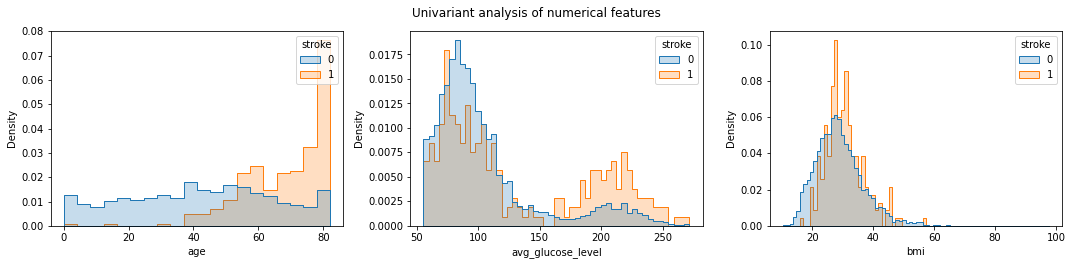

In [14]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariant analysis of numerical features')
for i in range(0, len(num_cols)):
    plt.subplot(3,3, i+1)
    sns.histplot(x= df[num_cols[i]], data = df, element = 'step', hue = 'stroke', stat="density", common_norm=False, color = 'b')
    plt.tight_layout();

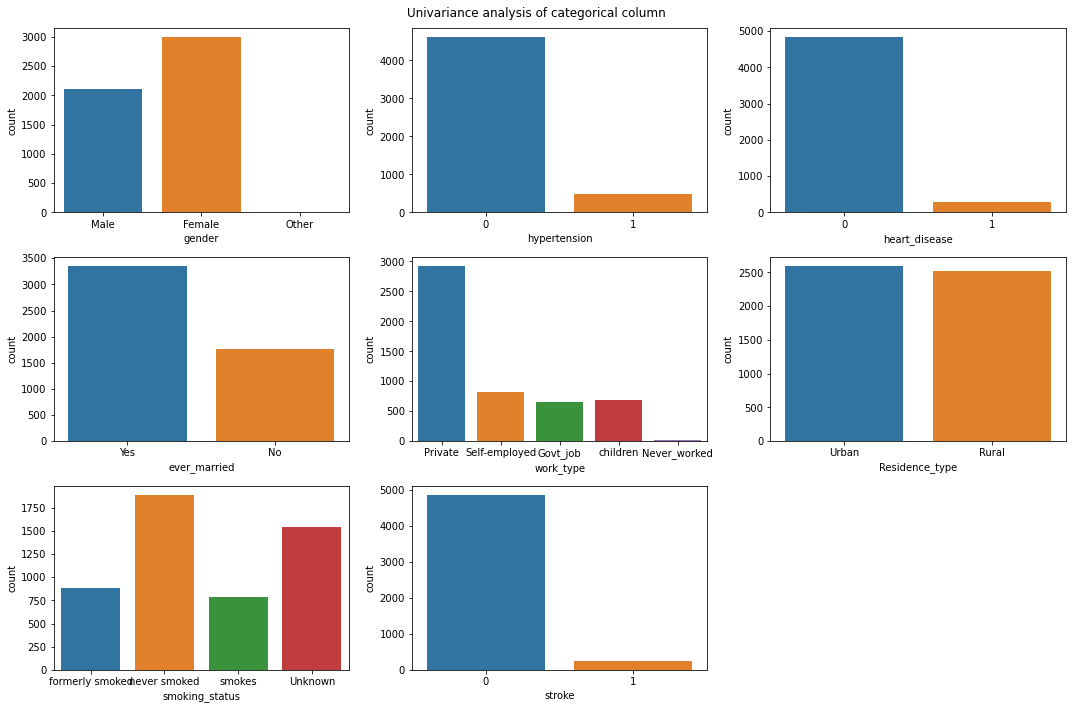

In [15]:
#Univariance Analysis of categorical features using countplot without hue 
plt.figure(figsize= (15,10))
plt.suptitle('Univariance analysis of categorical column')
for i in range(0, len(cat_cols)):
    plt.subplot(3,3, i+1)
    sns.countplot(x= df[cat_cols[i]], data = df)
    plt.tight_layout()

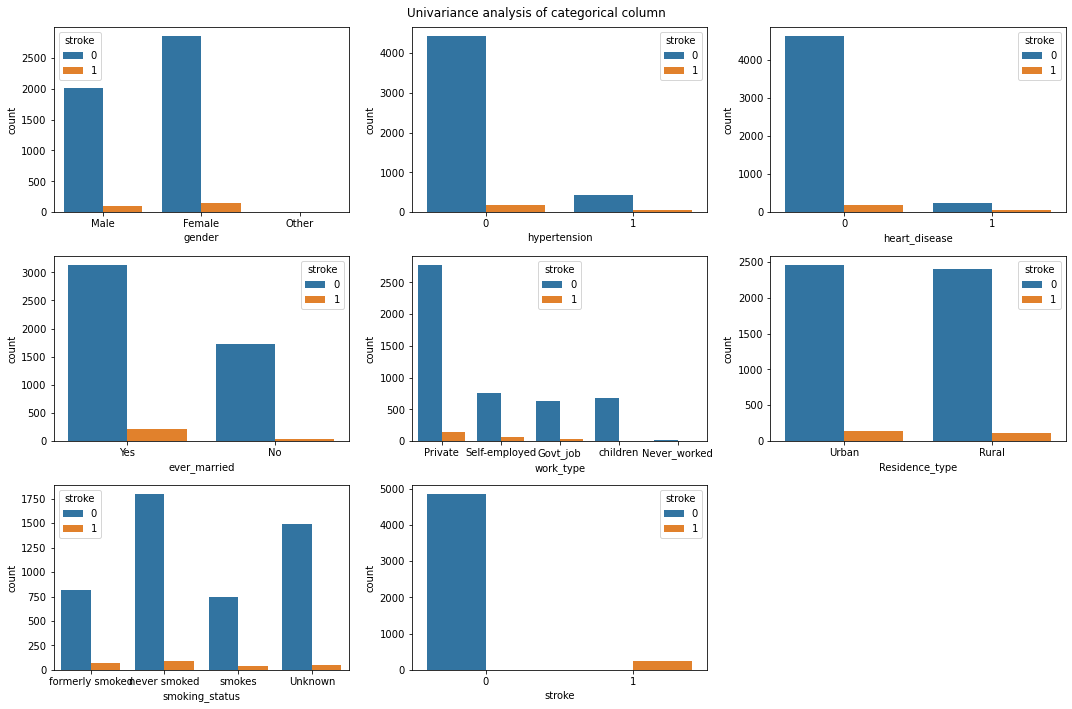

In [16]:
#Univariance Analysis of categorical features using countplot with hue 
plt.figure(figsize= (15,10))
plt.suptitle('Univariance analysis of categorical column')
for i in range(0, len(cat_cols)):
    plt.subplot(3,3, i+1)
    sns.countplot(x= df[cat_cols[i]], hue = 'stroke',  data = df)
    plt.tight_layout()

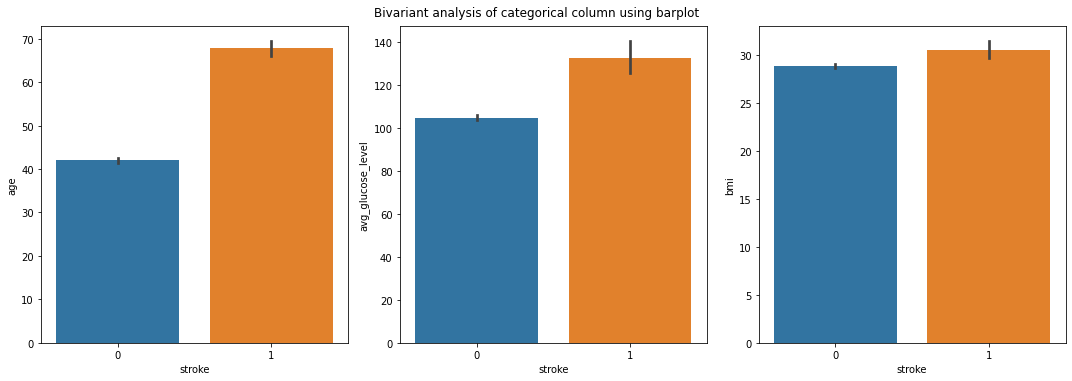

In [17]:
#Bivariant analysis of numerical column using barplot without hue 
plt.figure(figsize=(15,10))
plt.suptitle('Bivariant analysis of categorical column using barplot')
for i in range(0, len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.barplot(y= df[num_cols[i]], x='stroke', data =df)
    plt.tight_layout()

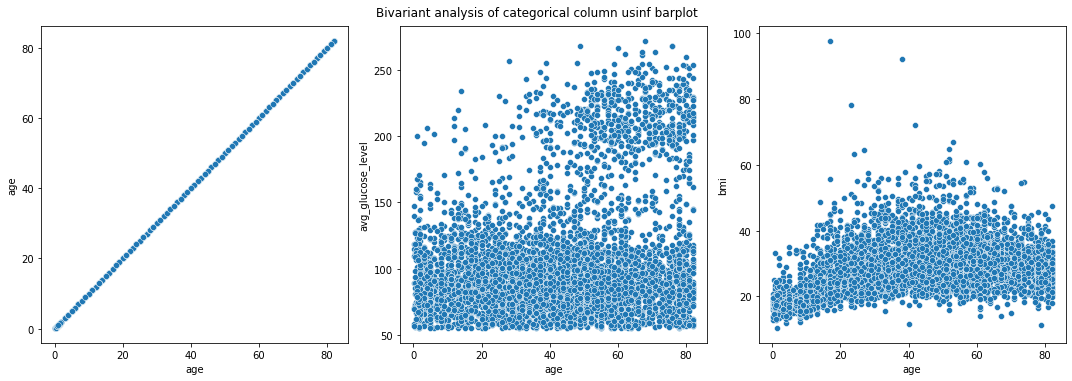

In [18]:
#Bivariant analysis of numerical column using scatter plot without hue
plt.figure(figsize=(15,10))
plt.suptitle('Bivariant analysis of categorical column usinf barplot')
for i in range(0, len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(y= df[num_cols[i]], x='age', data =df)
    plt.tight_layout()

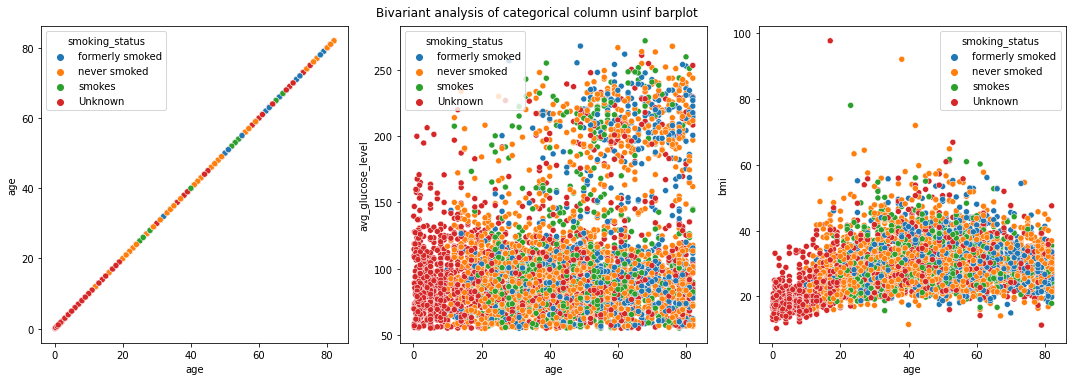

In [19]:
#Bivariant analysis of numerical column using scatter plot with hue
plt.figure(figsize=(15,10))
plt.suptitle('Bivariant analysis of categorical column usinf barplot')
for i in range(0, len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(y= df[num_cols[i]], x='age', data =df, hue ='smoking_status')
    plt.tight_layout()

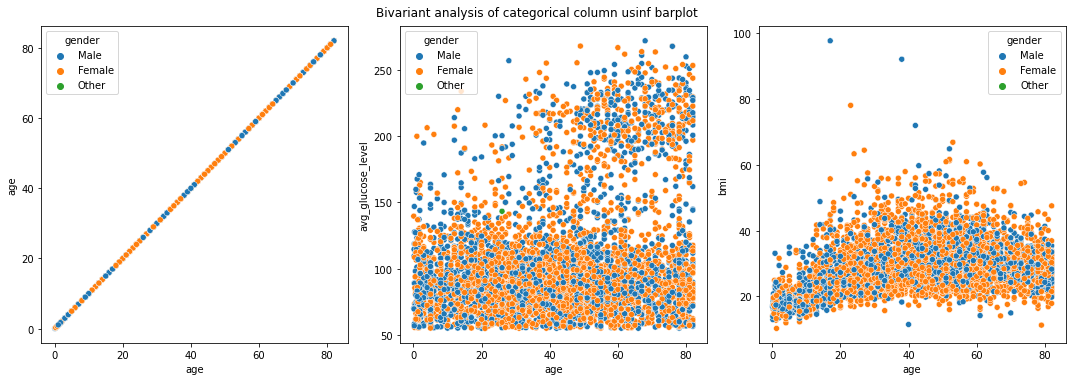

In [20]:
#Bivariant analysis of numerical column using scatter plot with hue
plt.figure(figsize=(15,10))
plt.suptitle('Bivariant analysis of categorical column usinf barplot')
for i in range(0, len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(y= df[num_cols[i]], x='age', data =df, hue ='gender')
    plt.tight_layout()

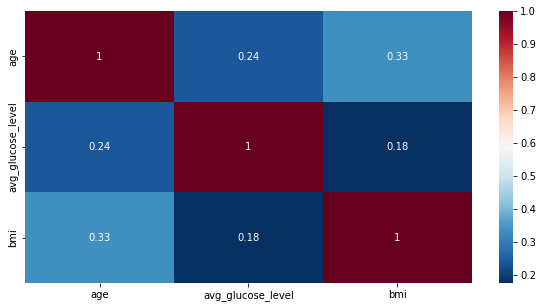

In [21]:
#Bivariance analysis of numerial column using heatmap
plt.figure(figsize= (10,5))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r')
plt.show()

In [22]:
df.groupby(df['stroke'] == 1)['age'].value_counts()

stroke  age 
False   52.0    88
        57.0    84
        53.0    83
        45.0    82
        51.0    82
                ..
True    32.0     1
        42.0     1
        43.0     1
        46.0     1
        47.0     1
Name: age, Length: 148, dtype: int64

## STEP 2. Pre - Processing

#### 1. Nulls treatment

In [23]:
#Check for nulls 
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
#Lets fill with mean 
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
#Check for duplicates
df.duplicated().sum()

0

#### 2. Outliers Treatment

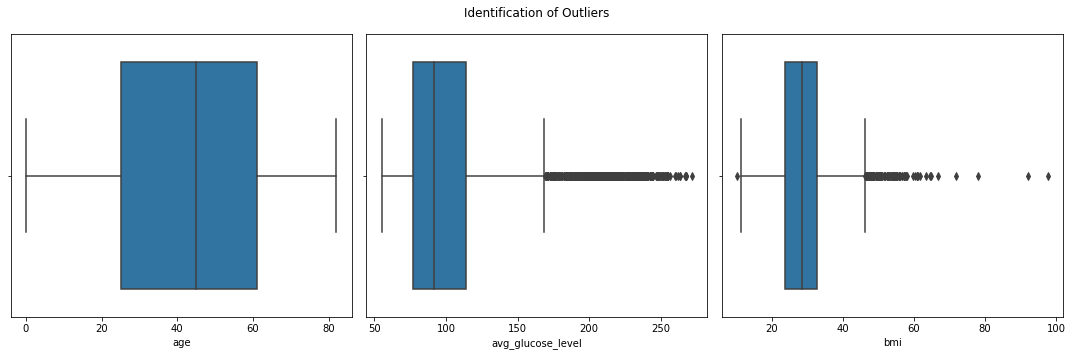

In [26]:
plt.figure(figsize=(15, 5))
plt.suptitle('Identification of Outliers')
for i in range (0, len(num_cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x= df[num_cols[i]], data = df)
    plt.tight_layout()

In [27]:
def clip_outliers(df,fea):
    data= df[fea].values
    data.sort()
    Q1,Q3 = np.percentile(df[fea],[25,75])
    IQR = Q3-Q1
    lowerfence = Q1-(1.5*IQR)
    upperfence = Q3+(1.5*IQR)
    df[fea] = df[fea].apply(lambda x:lowerfence if x<lowerfence else x)
    df[fea] = df[fea].apply(lambda x:upperfence if x>upperfence else x)

In [28]:
clip_outliers(df, 'bmi')
clip_outliers(df, 'avg_glucose_level')

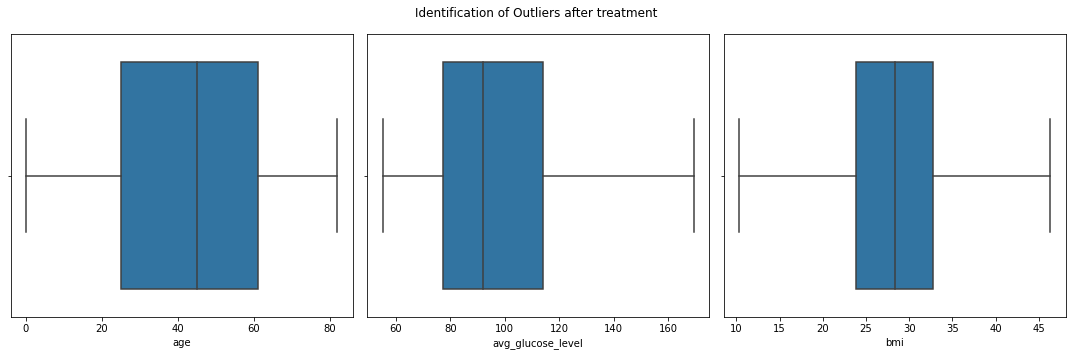

In [29]:
plt.figure(figsize=(15, 5))
plt.suptitle('Identification of Outliers after treatment')
for i in range (0, len(num_cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x= df[num_cols[i]], data = df)
    plt.tight_layout()

#### 3. Treating the categorical features. 

In [30]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in cat_cols:
    df[i] = label.fit_transform(df[i])

#### 4. Treating the imbalance 

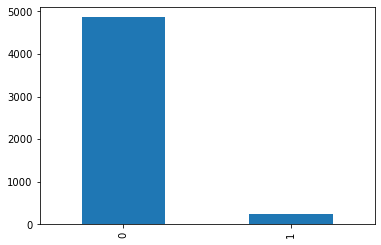

In [31]:
#Check the balance of target variable 
df['stroke'].value_counts().plot.bar();

<AxesSubplot:ylabel='stroke'>

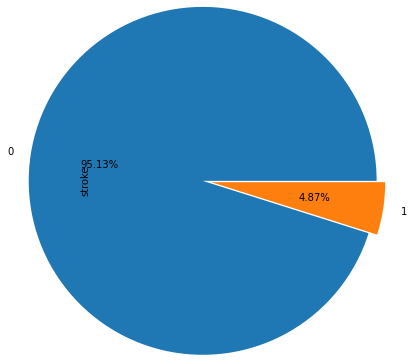

In [32]:
a = df.groupby('stroke')['stroke'].count()
a.plot(kind = 'pie', radius=2, explode = (0,0.1), autopct='%.2f%%')

In [33]:
# X and y variable 
X = df.drop('stroke', axis =1)
y = df['stroke']

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size=0.2, random_state=40)

In [35]:
print('Xtrain shape is :', Xtrain.shape)
print('Xtest shape is :', Xtest.shape)
print('ytrain shape is :', ytest.shape)
print('ytest shape is :', ytest.shape)

Xtrain shape is : (4088, 10)
Xtest shape is : (1022, 10)
ytrain shape is : (1022,)
ytest shape is : (1022,)


In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=101)
Xtrain_bal , ytrain_bal = smote.fit_resample(Xtrain, ytrain)

In [37]:
print('Value count before sampling:')
print(ytrain.value_counts())
print('-------------------------------------')
print('Value count after sampling:')
print(ytrain_bal.value_counts())

Value count before sampling:
0    3882
1     206
Name: stroke, dtype: int64
-------------------------------------
Value count after sampling:
0    3882
1    3882
Name: stroke, dtype: int64


In [38]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [39]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,55.12,10.3,1,1
1,0,61.0,0,0,1,3,0,55.22,11.3,2,1
2,1,80.0,0,1,1,2,0,55.23,11.5,2,1
3,0,49.0,0,0,1,2,1,55.25,12.0,3,1
4,0,79.0,1,0,1,3,0,55.26,12.3,2,1


## 3. MODEL BUILDING 

In [40]:
#Import all the classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [41]:
#Import the metrics 
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, precision_score, precision_recall_fscore_support

In [42]:
#Import the cross validation 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [43]:
#Lets declare a list for final dataframe 
models = []

#### Logistic Classification

In [44]:
log = LogisticRegression()
log.fit(Xtrain_bal, ytrain_bal)


Train_score_log = log.score(Xtrain_bal, ytrain_bal)
ypred_log = log.predict(Xtest)


Accuracy_log = accuracy_score(ytest, ypred_log)
p,r,f,s = precision_recall_fscore_support(ytest, ypred_log, average='macro')
roc_log = roc_auc_score(ytest, ypred_log)

print('Confusion Matrix:')
print('')
print(confusion_matrix(ytest, ypred_log))
print('')
print('Train accuracy score :', Train_score_log)
print('Test accuracy score :', Accuracy_log)
print('')
print('--------------------------------------------------------------')
print(classification_report(ytest, ypred_log))

models.append(['Logistics Regression', p,r,f,Accuracy_log,roc_log])

Confusion Matrix:

[[973   6]
 [  0  43]]

Train accuracy score : 0.997552807831015
Test accuracy score : 0.9941291585127201

--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       979
           1       0.88      1.00      0.93        43

    accuracy                           0.99      1022
   macro avg       0.94      1.00      0.97      1022
weighted avg       0.99      0.99      0.99      1022



#### SVC

In [45]:
svc = SVC()
svc.fit(Xtrain_bal, ytrain_bal)



Train_score_svc = svc.score(Xtrain_bal, ytrain_bal)
ypred_svc = svc.predict(Xtest)


Accuracy_svc = accuracy_score(ytest, ypred_svc)
p2,r2,f2,s2 = precision_recall_fscore_support(ytest, ypred_svc, average='macro')
roc_svc = roc_auc_score(ytest, ypred_svc)

print('Confusion Matrix:')
print('')
print(confusion_matrix(ytest, ypred_svc))
print('')
print('Train accuracy score :', Train_score_svc)
print('Test accuracy score :', Accuracy_svc)
print('')
print('--------------------------------------------------------------')
print(classification_report(ytest, ypred_svc))

models.append(['SVC Regression', p2,r2,f2,Accuracy_svc,roc_svc])



Confusion Matrix:

[[956  23]
 [  0  43]]

Train accuracy score : 0.98827923750644
Test accuracy score : 0.9774951076320939

--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       979
           1       0.65      1.00      0.79        43

    accuracy                           0.98      1022
   macro avg       0.83      0.99      0.89      1022
weighted avg       0.99      0.98      0.98      1022



#### KNN

In [46]:
knn = KNeighborsClassifier()
knn.fit(Xtrain_bal, ytrain_bal)



Train_score_knn  = knn.score(Xtrain_bal, ytrain_bal)
ypred_knn = knn.predict(Xtest)


Accuracy_knn = accuracy_score(ytest, ypred_knn)
p3,r3,f3,s3 = precision_recall_fscore_support(ytest, ypred_knn, average='macro')
roc_knn = roc_auc_score(ytest, ypred_knn)

print('Confusion Matrix:')
print('')
print(confusion_matrix(ytest, ypred_knn))
print('')
print('Train accuracy score :', Train_score_knn)
print('Test accuracy score :', Accuracy_knn)
print('')
print('--------------------------------------------------------------')
print(classification_report(ytest, ypred_knn))

models.append(['KNN Regression', p3,r3,f3,Accuracy_knn,roc_knn])


Confusion Matrix:

[[968  11]
 [  0  43]]

Train accuracy score : 0.997552807831015
Test accuracy score : 0.9892367906066536

--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       979
           1       0.80      1.00      0.89        43

    accuracy                           0.99      1022
   macro avg       0.90      0.99      0.94      1022
weighted avg       0.99      0.99      0.99      1022



#### Decision Tree

In [47]:
tree = DecisionTreeClassifier()
tree.fit(Xtrain_bal, ytrain_bal)



Train_score_tree  = tree.score(Xtrain_bal, ytrain_bal)
ypred_tree = tree.predict(Xtest)


Accuracy_tree = accuracy_score(ytest, ypred_tree)
p4,r4,f4,s4 = precision_recall_fscore_support(ytest, ypred_tree, average='macro')
roc_tree = roc_auc_score(ytest, ypred_tree)

print('Confusion Matrix:')
print('')
print(confusion_matrix(ytest, ypred_tree))
print('')
print('Train accuracy score :', Train_score_tree)
print('Test accuracy score :', Accuracy_tree)
print('')
print('--------------------------------------------------------------')
print(classification_report(ytest, ypred_tree))

models.append(['Tree Regression', p4,r4,f4,Accuracy_tree,roc_tree])


Confusion Matrix:

[[979   0]
 [  1  42]]

Train accuracy score : 1.0
Test accuracy score : 0.9990215264187867

--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      0.98      0.99        43

    accuracy                           1.00      1022
   macro avg       1.00      0.99      0.99      1022
weighted avg       1.00      1.00      1.00      1022



#### Random Forest

In [48]:
rf = RandomForestClassifier()
rf.fit(Xtrain_bal, ytrain_bal)



Train_score_rf  = rf.score(Xtrain_bal, ytrain_bal)
ypred_rf = rf.predict(Xtest)


Accuracy_rf = accuracy_score(ytest, ypred_rf)
p5,r5,f5,s5 = precision_recall_fscore_support(ytest, ypred_rf, average='macro')
roc_rf = roc_auc_score(ytest, ypred_rf)

print('Confusion Matrix:')
print('')
print(confusion_matrix(ytest, ypred_rf))
print('')
print('Train accuracy score :', Train_score_rf)
print('Test accuracy score :', Accuracy_rf)
print('')
print('--------------------------------------------------------------')
print(classification_report(ytest, ypred_rf))

models.append(['Random Forest Regression', p5,r5,f5,Accuracy_rf,roc_rf])


Confusion Matrix:

[[979   0]
 [  0  43]]

Train accuracy score : 1.0
Test accuracy score : 1.0

--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00        43

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



In [52]:
model = pd.DataFrame(models, columns= ['Classifier', 'Macro_Precision', 'Macro_Recall', 'Macro_support', 'Accuracy', 'ROC'])
model

,Classifier,Macro_Precision,Macro_Recall,Macro_support,Accuracy,ROC
0,Logistics Regression,0.938776,0.996936,0.965854,0.994129,0.996936
1,SVC Regression,0.825758,0.988253,0.888552,0.977495,0.988253
2,KNN Regression,0.898148,0.994382,0.940474,0.989237,0.994382
3,Tree Regression,0.999490,0.988372,0.993862,0.999022,0.988372
4,Random Forest Regression,1.000000,1.000000,1.000000,1.000000,1.000000


## Since the dataset is very small, The default Random Forest model gives 100% accuracy 